In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
rr_df = pd.read_json('renttherunway_final_data.json', lines=True)
mc_df = pd.read_json('modcloth_final_data.json', lines=True)

In [3]:
rr_df.columns

Index(['age', 'body type', 'bust size', 'category', 'fit', 'height', 'item_id',
       'rating', 'rented for', 'review_date', 'review_summary', 'review_text',
       'size', 'user_id', 'weight'],
      dtype='object')

In [4]:
mc_df.columns

Index(['bra size', 'bust', 'category', 'cup size', 'fit', 'height', 'hips',
       'item_id', 'length', 'quality', 'review_summary', 'review_text',
       'shoe size', 'shoe width', 'size', 'user_id', 'user_name', 'waist'],
      dtype='object')

In [5]:
mc_df.rename(columns={
    'quality':'rating',
    'bra size':'bra_size',
    'cup size':'cup_size'
},inplace=True)

In [9]:
rr_df.rename(columns={
    'body type':'body_type',
    'rented for':'rented_for',
    'bust size':'bra_size'
},inplace=True)

In [10]:
rr_df.columns

Index(['age', 'body_type', 'bra_size', 'category', 'fit', 'height', 'item_id',
       'rating', 'rented_for', 'review_date', 'review_summary', 'review_text',
       'size', 'user_id', 'weight'],
      dtype='object')

#### split bust_size from rr_df, just like mc_df

In [11]:
rr_df['cup_size'] = rr_df['bra_size']

In [12]:
bust = rr_df['bra_size']
cup = []
bra = []
for i in range(len(bust)):
#     bust[i] = str(bust[i])
    if isinstance(bust[i], float) or bust[i] == 'NaN' or bust[i] == 'nan':
        cup.append(float('NaN'))
        bra.append(float('NaN'))
        continue
#     print(i)
    bra.append(bust[i][:2])
    cup.append(bust[i][2:])

In [13]:
rr_df['cup_size'] = cup
rr_df['bra_size'] = bra

In [14]:
rr_df['bra_size'] = [float(j) for j in rr_df['bra_size']]

In [15]:
rr_df.head()

,age,body_type,bra_size,category,fit,height,item_id,rating,rented_for,review_date,review_summary,review_text,size,user_id,weight,cup_size
0,28.0,hourglass,34.0,romper,fit,"5' 8""",2260466,10.0,vacation,"April 20, 2016",So many compliments!,An adorable romper! Belt and zipper were a lit...,14,420272,137lbs,d
1,36.0,straight & narrow,34.0,gown,fit,"5' 6""",153475,10.0,other,"June 18, 2013",I felt so glamourous!!!,I rented this dress for a photo shoot. The the...,12,273551,132lbs,b
2,116.0,NaN,NaN,sheath,fit,"5' 4""",1063761,10.0,party,"December 14, 2015",It was a great time to celebrate the (almost) ...,This hugged in all the right places! It was a ...,4,360448,NaN,NaN
3,34.0,pear,34.0,dress,fit,"5' 5""",126335,8.0,formal affair,"February 12, 2014",Dress arrived on time and in perfect condition.,I rented this for my company's black tie award...,8,909926,135lbs,c
4,27.0,athletic,34.0,gown,fit,"5' 9""",616682,10.0,wedding,"September 26, 2016",Was in love with this dress !!!,I have always been petite in my upper body and...,12,151944,145lbs,b


In [16]:
rr_df['rating'] = [rr_df['rating'][i]/2 for i in range(len(rr_df['rating']))] # let rating in same scale

In [17]:
rr_df.rating

0         5.0
1         5.0
2         5.0
3         4.0
4         5.0
5         4.0
6         5.0
7         5.0
8         5.0
9         5.0
10        4.0
11        4.0
12        5.0
13        4.0
14        5.0
15        5.0
16        5.0
17        5.0
18        4.0
19        5.0
20        5.0
21        4.0
22        5.0
23        4.0
24        5.0
25        4.0
26        5.0
27        5.0
28        4.0
29        5.0
         ... 
192514    4.0
192515    5.0
192516    4.0
192517    5.0
192518    3.0
192519    5.0
192520    4.0
192521    5.0
192522    4.0
192523    5.0
192524    3.0
192525    4.0
192526    5.0
192527    5.0
192528    5.0
192529    5.0
192530    5.0
192531    4.0
192532    5.0
192533    4.0
192534    5.0
192535    2.0
192536    4.0
192537    5.0
192538    4.0
192539    5.0
192540    5.0
192541    3.0
192542    5.0
192543    5.0
Name: rating, Length: 192544, dtype: float64

#### change the height to be cm

In [18]:
def get_cms(x):
    if type(x) == type(1.0):
        return
    #print(x)
    try: 
        return (int(x[0])*30.48) + (int(x[4:-2])*2.54)
    except:
        return (int(x[0])*30.48)
mc_df.height = mc_df.height.apply(get_cms)

In [19]:
def get_cms_r(x):
    if type(x) == type(1.0):
        return
    #print(x)
    try: 
        return (int(x[0])*30.48) + (int(x[3])*2.54)
    except:
        return (int(x[0])*30.48)
rr_df.height = rr_df.height.apply(get_cms_r)

#### merge two datasets

In [20]:
data = pd.concat([rr_df, mc_df], ignore_index=True)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [21]:
df_ = pd.DataFrame(columns=['user_id','item_id'])

In [22]:
df_['user_id'] = data['user_id']

In [23]:
df_['item_id'] = data['item_id']

In [24]:
df_.head()

,user_id,item_id
0,420272,2260466
1,273551,153475
2,360448,1063761
3,909926,126335
4,151944,616682


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275334 entries, 0 to 275333
Data columns (total 23 columns):
age               191584 non-null float64
body_type         177907 non-null object
bra_size          250905 non-null float64
bust              11854 non-null object
category          275334 non-null object
cup_size          250668 non-null object
fit               275334 non-null object
height            273550 non-null float64
hips              56064 non-null float64
item_id           275334 non-null int64
length            82755 non-null object
rating            275184 non-null float64
rented_for        192534 non-null object
review_date       192544 non-null object
review_summary    268609 non-null object
review_text       268609 non-null object
shoe size         27915 non-null float64
shoe width        18607 non-null object
size              275334 non-null int64
user_id           275334 non-null int64
user_name         82790 non-null object
waist             2882 non-null

In [26]:
data.describe()

,age,bra_size,height,hips,item_id,rating,shoe size,size,user_id,waist
count,191584.000000,250905.000000,273550.000000,56064.000000,2.753340e+05,275184.000000,27915.000000,275334.000000,275334.000000,2882.000000
mean,33.871017,34.743118,164.775023,40.358501,8.723788e+05,4.366686,8.145818,12.370390,499300.295212,31.319223
std,8.058083,2.441723,7.175088,5.827166,7.329026e+05,0.853706,1.336109,8.430614,288249.327638,5.302849
min,0.000000,28.000000,91.440000,30.000000,1.233730e+05,1.000000,5.000000,0.000000,6.000000,20.000000
25%,29.000000,34.000000,160.020000,36.000000,2.224670e+05,4.000000,7.000000,8.000000,251353.500000,28.000000
50%,32.000000,34.000000,165.100000,39.000000,6.552110e+05,5.000000,8.000000,12.000000,498924.000000,30.000000
75%,37.000000,36.000000,170.180000,43.000000,1.353371e+06,5.000000,9.000000,16.000000,749031.000000,34.000000
max,117.000000,48.000000,241.300000,60.000000,2.966087e+06,5.000000,38.000000,58.000000,999997.000000,50.000000


In [27]:
data.head()

,age,body_type,bra_size,bust,category,cup_size,fit,height,hips,item_id,...,review_date,review_summary,review_text,shoe size,shoe width,size,user_id,user_name,waist,weight
0,28.0,hourglass,34.0,NaN,romper,d,fit,172.72,NaN,2260466,...,"April 20, 2016",So many compliments!,An adorable romper! Belt and zipper were a lit...,NaN,NaN,14,420272,NaN,NaN,137lbs
1,36.0,straight & narrow,34.0,NaN,gown,b,fit,167.64,NaN,153475,...,"June 18, 2013",I felt so glamourous!!!,I rented this dress for a photo shoot. The the...,NaN,NaN,12,273551,NaN,NaN,132lbs
2,116.0,NaN,NaN,NaN,sheath,NaN,fit,162.56,NaN,1063761,...,"December 14, 2015",It was a great time to celebrate the (almost) ...,This hugged in all the right places! It was a ...,NaN,NaN,4,360448,NaN,NaN,NaN
3,34.0,pear,34.0,NaN,dress,c,fit,165.10,NaN,126335,...,"February 12, 2014",Dress arrived on time and in perfect condition.,I rented this for my company's black tie award...,NaN,NaN,8,909926,NaN,NaN,135lbs
4,27.0,athletic,34.0,NaN,gown,b,fit,175.26,NaN,616682,...,"September 26, 2016",Was in love with this dress !!!,I have always been petite in my upper body and...,NaN,NaN,12,151944,NaN,NaN,145lbs


In [28]:
missing_data = pd.DataFrame({'total_missing': data.isnull().sum(), 'perc_missing': (data.isnull().sum()/275334)*100})
missing_data

,total_missing,perc_missing
age,83750,30.417602
body_type,97427,35.385023
bra_size,24429,8.872497
bust,263480,95.694684
category,0,0.000000
cup_size,24666,8.958574
fit,0,0.000000
height,1784,0.647940
hips,219270,79.637822
item_id,0,0.000000


In [29]:
data.drop(['waist'], axis=1, inplace=True) # drop the columns which fill less than 20%
data.drop(['bust'], axis=1, inplace=True)
data.drop(['shoe size'], axis=1, inplace=True)
data.drop(['shoe width'], axis=1, inplace=True)

In [30]:
weight = data['weight'] #make weight to numbers
new_weight = []
for i in range(len(weight)):
    if isinstance(weight[i],float) or weight[i] == 'NaN' or weight[i] == 'nan':
        new_weight.append(float('NaN'))
        continue
    new_weight.append(weight[i][:-3])
data['weight'] = new_weight

#### delete the outliers
find the rows that need to be deleted through plots

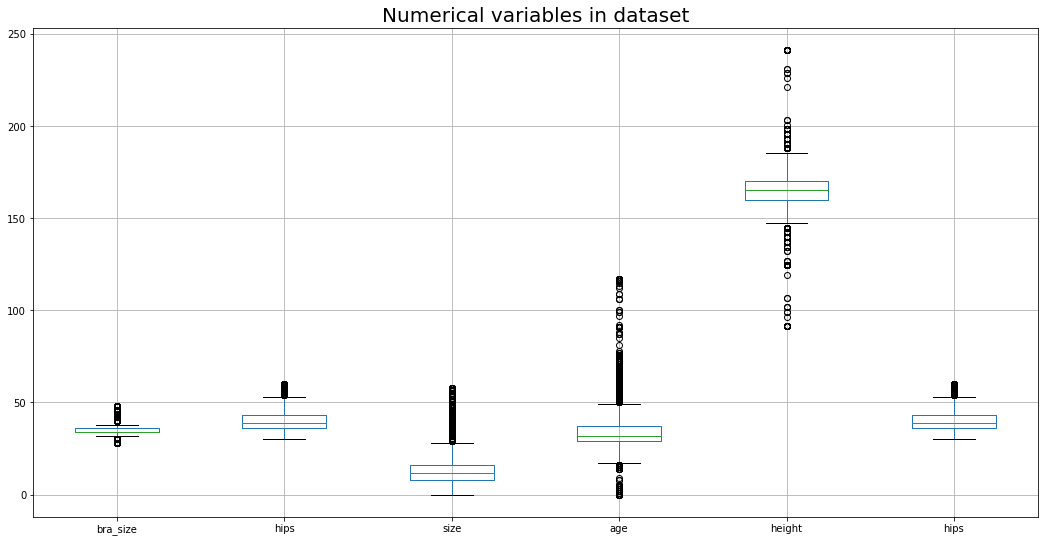

In [31]:
num_cols = ['bra_size','hips','size', 'age', 'height','hips']
plt.figure(figsize=(18,9))
data[num_cols].boxplot()
plt.title("Numerical variables in dataset", fontsize=20)
plt.show()

In [32]:
def plot_dist(col, ax):
    data[col][data[col].notnull()].value_counts().plot('bar', facecolor='y', ax=ax)
    ax.set_xlabel('{}'.format(col), fontsize=20)
    ax.set_title("{} on data".format(col), fontsize= 18)
    return ax

f, ax = plt.subplots(2,4, figsize = (22,15))
f.tight_layout(h_pad=9, w_pad=2, rect=[0, 0.03, 1, 0.93])
cols = ['bra_size', 'cup_size', 'fit', 'height', 'hips', 'length', 'size','category']
k = 0
for i in range(2):
    for j in range(4):
        plot_dist(cols[k], ax[i][j])
        k += 1
__ = plt.suptitle("Initial Distributions of features", fontsize= 25)

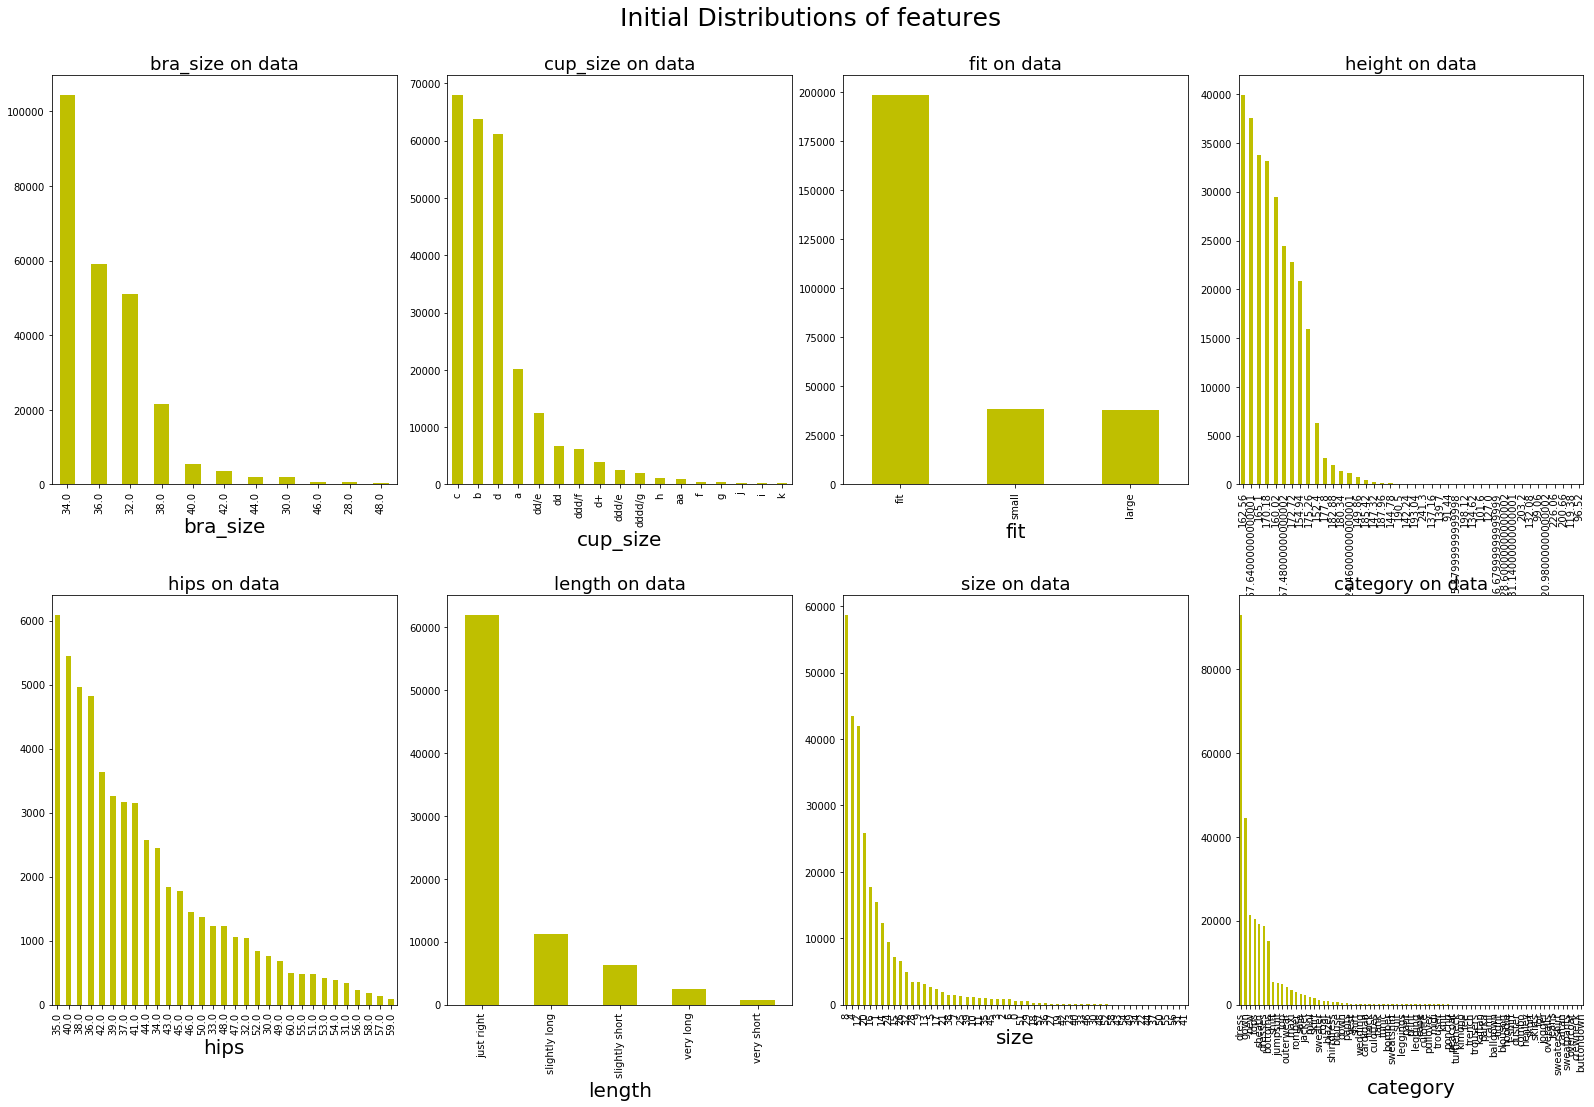

In [33]:
plt.show()

In [ ]:
missing_rows =data[data.rating.isnull()].index #drop the rows which don't have rating
data.drop(missing_rows, axis = 0, inplace=True)

In [43]:
from sklearn.preprocessing import LabelEncoder

cat = data
cat = cat.astype(str)
catnew = cat.apply(LabelEncoder().fit_transform)

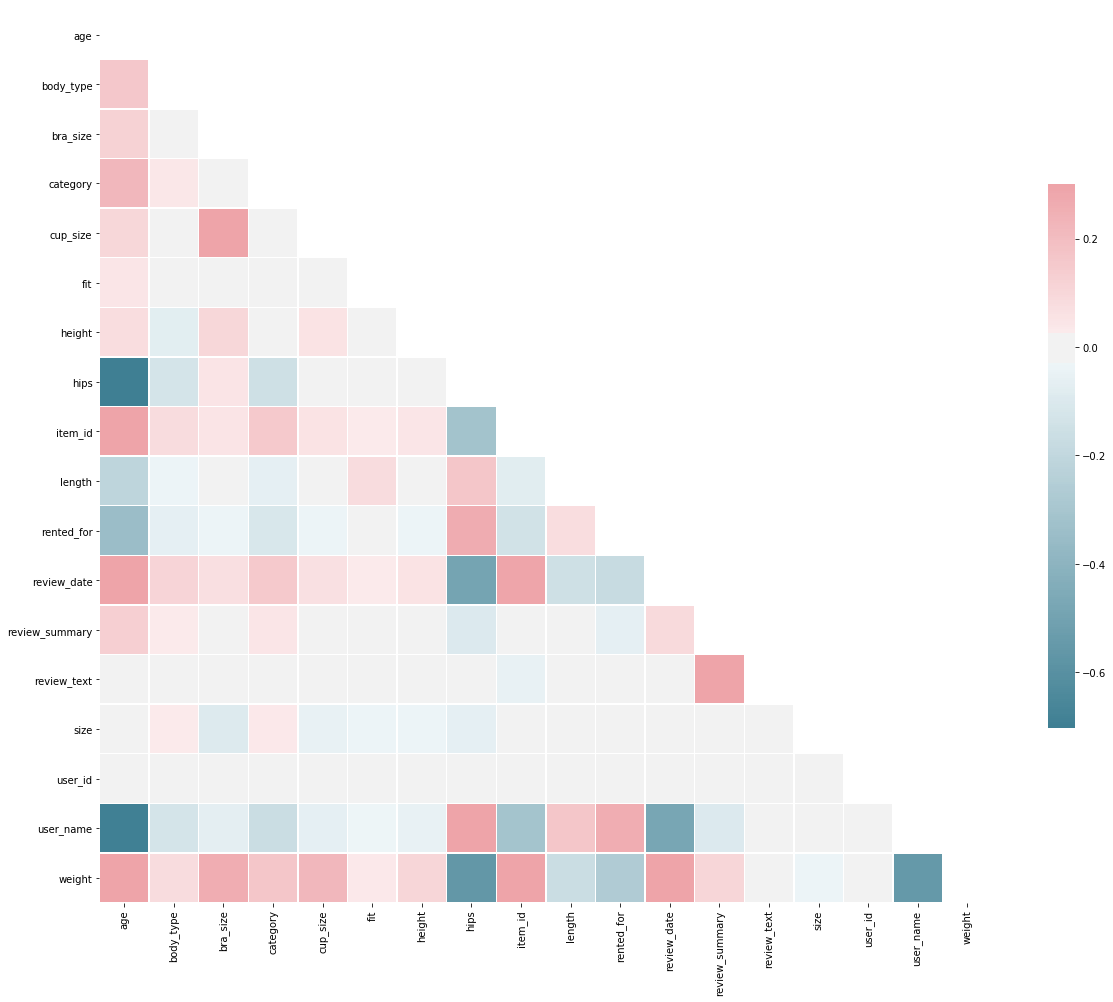

In [44]:
corr = catnew.corr()
import matplotlib.pyplot as plt

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [ ]:
y = data['rating'].values

In [38]:
data.drop(['rating'], axis=1, inplace=True)

In [46]:
from sklearn.preprocessing import MinMaxScaler
norm_final = MinMaxScaler().fit_transform(catnew)

In [47]:
y_norm = (y - min(y)) / (max(y) - min(y))

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(norm_final, y_norm, test_size=0.1)

### models and k fold validation

In [49]:
from sklearn import datasets, linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred_linear = regr.predict(X_test)

In [52]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print( mean_squared_error(y_test, y_pred_linear), mean_absolute_error(y_test, y_pred_linear))

0.03812439052052871 0.1550693001647302


In [53]:
from sklearn.model_selection import KFold

clf = linear_model.LinearRegression()
k_fold = KFold(10,shuffle=True)
# totalf1 = 0
# totalacc = 0
error = []
error_a = []
for (train_1, test_1) in (k_fold.split(norm_final)):
    clf.fit(norm_final[train_1], y_norm[train_1])
    y_pred_linear = clf.predict(norm_final[test_1])
    pred = []
    for i in range(len(y_pred_linear)):
        pred.append(y_pred_linear[i]*(y.max()-y.min())+y.min())
    test = []
    for i in range(len(y_norm[test_1])):
        test.append(y_norm[test_1][i]*(y.max()-y.min())+y.min())
    
    error.append(mean_squared_error(test, pred))
    error_a.append(mean_absolute_error(test, pred))
print(min(error))
print(min(error_a))

0.6121973625537876
0.6191145673604126


In [54]:
# Lasso model
from sklearn import linear_model
lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

In [55]:
print( mean_squared_error(y_test, y_pred_lasso),mean_absolute_error(y_test, y_pred_lasso))

0.045110617227943045 0.17699971793750474


In [56]:
lasso = linear_model.Lasso(alpha=0.1)
k_fold = KFold(10,shuffle=True)
# totalf1 = 0
# totalacc = 0
error = []
error_a = []
for (train_1, test_1) in (k_fold.split(norm_final)):
    lasso.fit(norm_final[train_1], y_norm[train_1])
    y_pred_lasso = lasso.predict(norm_final[test_1])
    pred = []
    for i in range(len(y_pred_lasso)):
        pred.append(y_pred_lasso[i]*(y.max()-y.min())+y.min())
    test = []
    for i in range(len(y_norm[test_1])):
        test.append(y_norm[test_1][i]*(y.max()-y.min())+y.min())
    
    error.append(mean_squared_error(test, pred))
    error_a.append(mean_absolute_error(test, pred))
print(min(error))
print(min(error_a))

0.7230192333996271
0.7069354099950543


In [57]:
# Ridge model
from sklearn import linear_model
ridge = linear_model.Ridge(alpha=.5)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

In [58]:
print( mean_squared_error(y_test, y_pred_ridge),mean_absolute_error(y_test, y_pred_ridge))

0.03812439435376065 0.15506943522476835


In [59]:
ridge = linear_model.Ridge(alpha=.5)
k_fold = KFold(10,shuffle=True)
# totalf1 = 0
# totalacc = 0
error = []
error_a = []
for (train_1, test_1) in (k_fold.split(norm_final)):
    ridge.fit(norm_final[train_1], y_norm[train_1])
    y_pred_ridge = ridge.predict(norm_final[test_1])
    pred = []
    for i in range(len(y_pred_ridge)):
        pred.append(y_pred_ridge[i]*(y.max()-y.min())+y.min())
    test = []
    for i in range(len(y_norm[test_1])):
        test.append(y_norm[test_1][i]*(y.max()-y.min())+y.min())
    
    error.append(mean_squared_error(test, pred))
    error_a.append(mean_absolute_error(test, pred))
print(min(error))
print(min(error_a))

0.6043859328900266
0.6159111408897796


In [60]:
from sklearn import neighbors
knn = neighbors.KNeighborsRegressor(4)
y_pred_knn = knn.fit(X_train, y_train).predict(X_test)

In [61]:
print( mean_squared_error(y_test, y_pred_knn),mean_absolute_error(y_test, y_pred_knn))

0.04641835527272067 0.16194947127439224


In [62]:
knn = neighbors.KNeighborsRegressor(4)
k_fold = KFold(10,shuffle=True)
# totalf1 = 0
# totalacc = 0
error = []
error_a = []
for (train_1, test_1) in (k_fold.split(norm_final)):
    y_pred_knn = knn.fit(norm_final[train_1], y_norm[train_1]).predict(norm_final[test_1])
    pred = []
    for i in range(len(y_pred_knn)):
        pred.append(y_pred_knn[i]*(y.max()-y.min())+y.min())
    test = []
    for i in range(len(y_norm[test_1])):
        test.append(y_norm[test_1][i]*(y.max()-y.min())+y.min())
    
    error.append(mean_squared_error(test, pred))
    error_a.append(mean_absolute_error(test, pred))
print(min(error))
print(min(error_a))

0.7390117377716404
0.6424470365928995
